<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-2/blob/main/ImagenATexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=0b1b7a5e3ab4b93321b133dab8a6a2f26d4341a0c6beb3419d019b232a5d5950
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
import pytesseract
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from collections import namedtuple

In [ ]:
!unzip Prueba.zip

Archive:  Prueba.zip
  inflating: pagina1.jpg             
  inflating: 26119A00100021_page-0002.jpg  


In [ ]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.figure(figsize = (180,18))
        plt.imshow(img2,)
        
        plt.show()
    else:
        img2 = image
        plt.figure(figsize = (180,18))
        plt.imshow(img2,cmap='gray',shape=600)
        
        plt.show()

In [ ]:
imagen=cv2.imread("pagina1.jpg")
imagen2=cv2.imread("pagina2.jpg")
imagen=cv2.vconcat([imagen,imagen2])

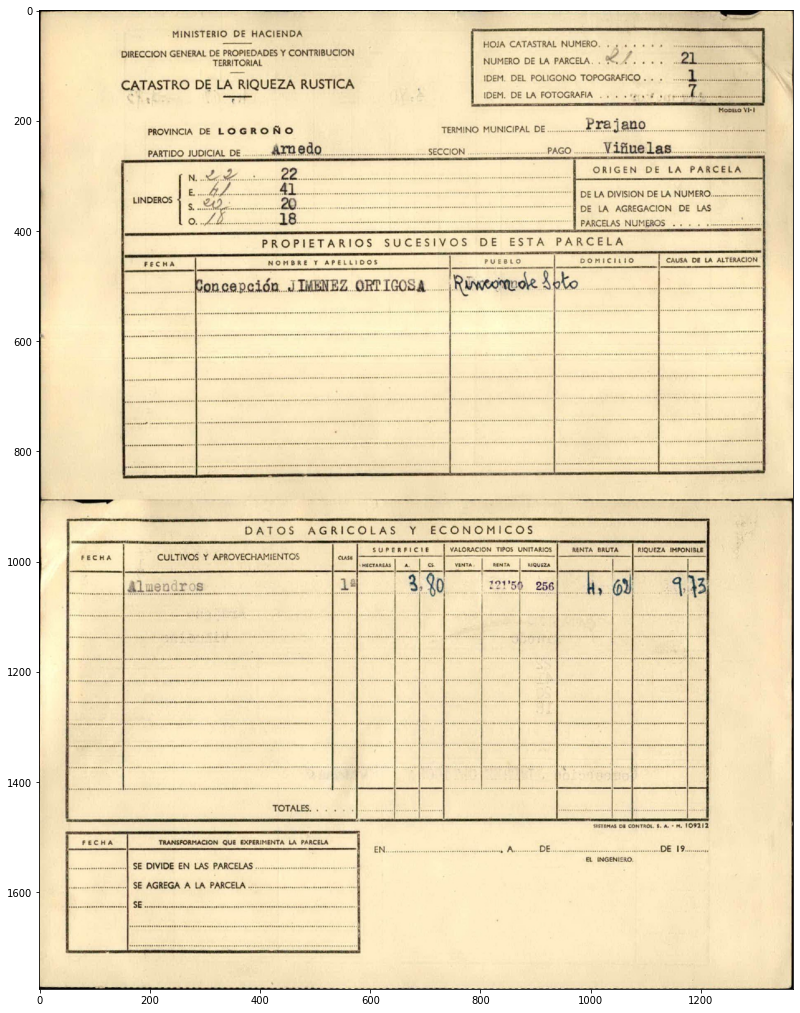

In [ ]:
mostrarImagen(imagen)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
OCRLocation = namedtuple ( "OCRLocation" , [ "id" , "bbox" ])

In [ ]:
OCR_Locations=[
    OCRLocation("termino municipal",(940,185,310,40)),
    OCRLocation("partido judicial",(380,225,300,45)),
    OCRLocation("numero de parcela",(1150,68,150,31)),
    OCRLocation("cultivos 1",(155,1020,380,40)),
    OCRLocation("cultivos 2",(155,1060,380,40)),
    OCRLocation("cultivos 3",(155,1100,380,40))
    ]

In [ ]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [ ]:
parsingResults=[]
for loc in OCR_Locations:
  (x,y,w,h)=loc.bbox
  roi=imagen[y:y + h, x:x + w]


  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  copia=roi.copy()
  ret2,copia = cv2.threshold(copia,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  text=pytesseract.image_to_string(copia,config='--psm 8')

  for line in text.split("\n"):
    if(len(line))==0:
      continue
    
    lower=line.lower()
    count = 0

    if count==0:
      parsingResults.append((loc,line))

results={}

for(loc,line) in parsingResults:
  r=results.get(loc.id,None)

  if r is None:
    results[loc.id]=(line,loc._asdict())
  else:
    (existingText,loc)=r
    text="{}\n".format(existingText,line)

    results[loc["id"]]=(text,loc)
for (locID,result) in results.items():
  (text,loc)=result
  print(loc["id"])
  print("=" * len(loc["id"]))
  print("{}\n\n".format(text))
  (x,y,w,h)=loc["bbox"]
  clean=cleanup_text(text)
  cv2.rectangle(imagen,(x,y),(x+w,y+h),(0,255,0,2))
  for (i,line) in enumerate(text.split("\n")):
    startY=y+(i*70)+40
#mostrarImagen(imagen)

termino municipal
| Prajano



partido judicial
| aroedo..



numero de parcela
2



cultivos 1
Aluendros  .—s—s—s—iCY



cultivos 2
BP



cultivos 3
Pe





In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,407 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

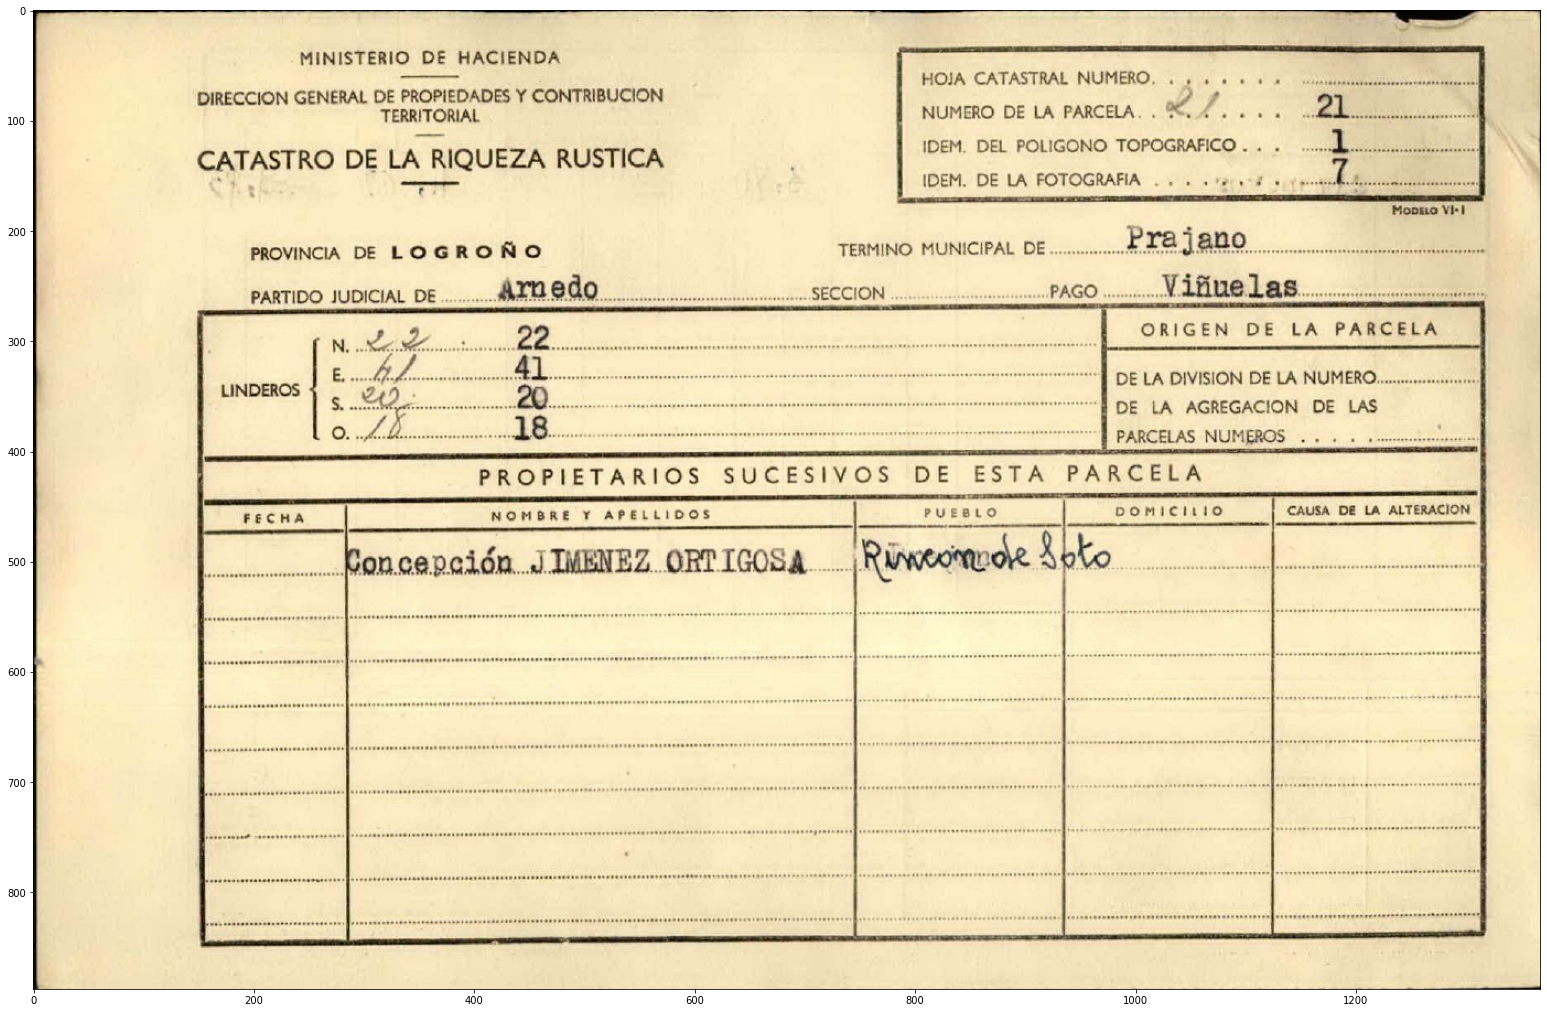

In [ ]:

mostrarImagen(imagen)

In [ ]:

text2=pytesseract.image_to_string(imagen,config="outputbase digits")
text2

KeyboardInterrupt: ignored

In [ ]:
copia=imagen.copy()
ret2,copia = cv2.threshold(copia,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
copia = cv2.cvtColor(copia, cv2.COLOR_BGR2GRAY)
#copia = cv2.medianBlur(copia,1)

In [ ]:
#copia=cv2.adaptiveThreshold(copia,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#copia=cv2.adaptiveThreshold(copia,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#copia = cv2.GaussianBlur(copia,(5,5),0)
#ret3,copia = cv2.threshold(copia,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


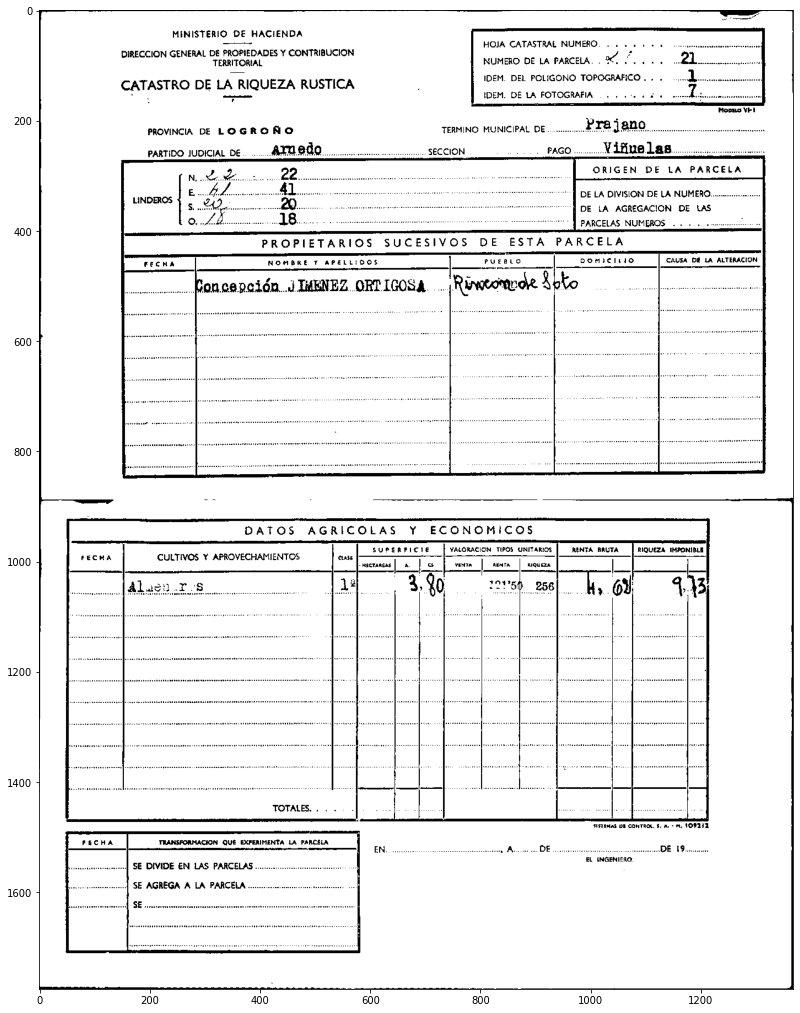

In [ ]:
mostrarImagen(copia)

In [ ]:
#FILTRO:
def aplicaFiltro(imagen):
  r,g,b = cv2.split(imagen) #Canal blue en gris
  th = cv2.adaptiveThreshold(b,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,7) #threshold
  resultado=cv2.fastNlMeansDenoising(th, [50]) #Eliminación de ruido
  return resultado

In [ ]:
copia=imagen.copy()
(x,y,w,h)=OCR_Locations[3].bbox
roi=copia[y:y + h, x:x + w]
final=aplicaFiltro(roi)
print(pytesseract.image_to_string(final,config='--psm 8'))

Almendros i ssid



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


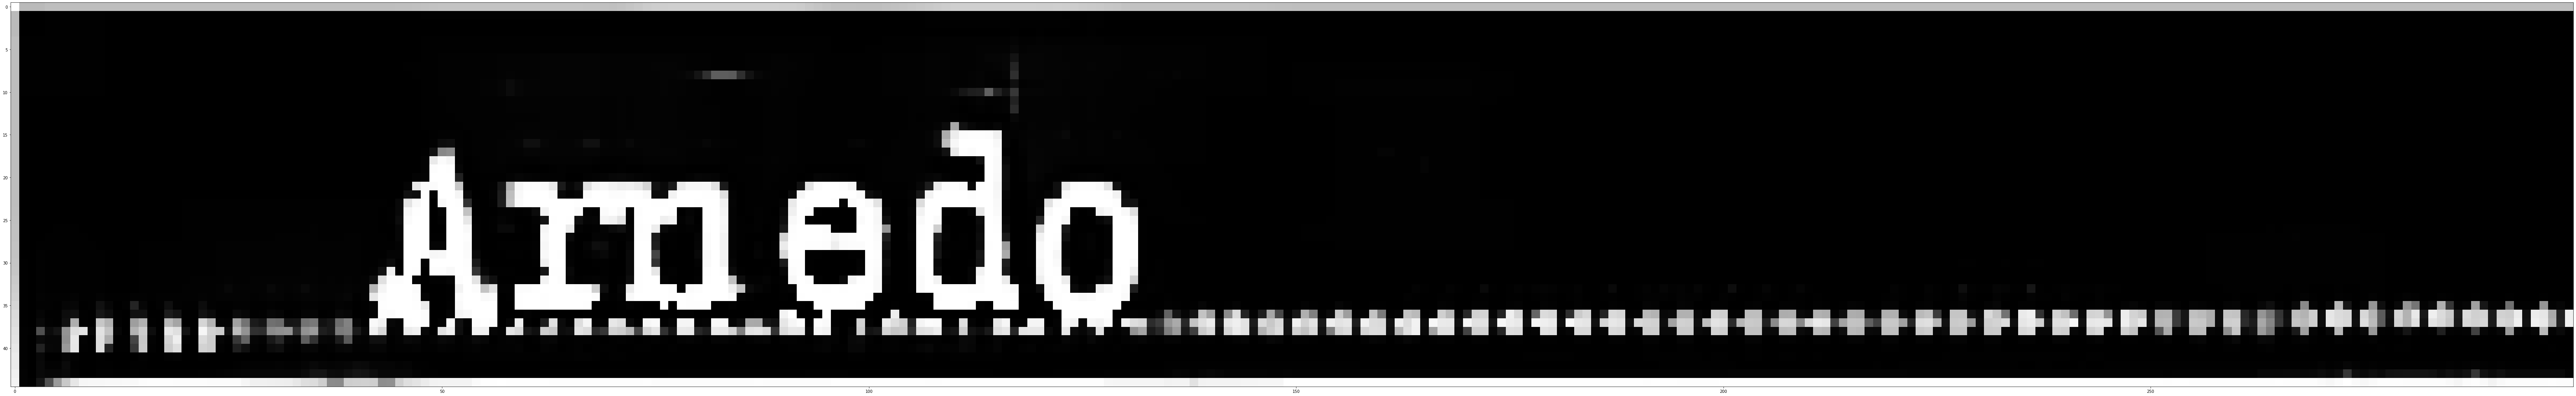

In [ ]:

(x,y,w,h)=OCR_Locations[1].bbox
roi=copia[y:y + h, x:x + w]
final=aplicaFiltro(roi)
imagem = cv2.bitwise_not(final)
mostrarImagen(imagem)

In [ ]:
print(pytesseract.image_to_string(resultado,config='--psm 8'))

In [ ]:
cnts = cv2.findContours(imagem.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
chars = []
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w >= 10 and h >= 15:
    chars.append(c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


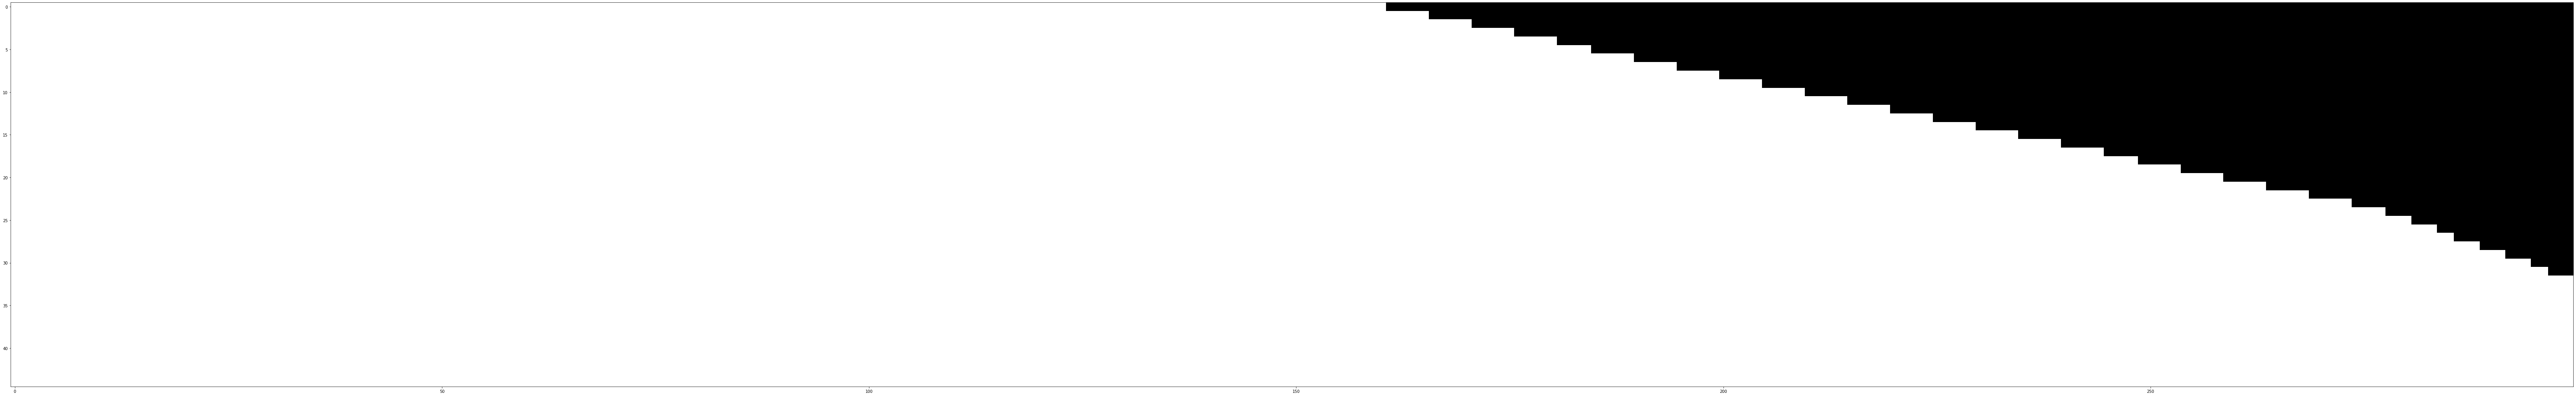

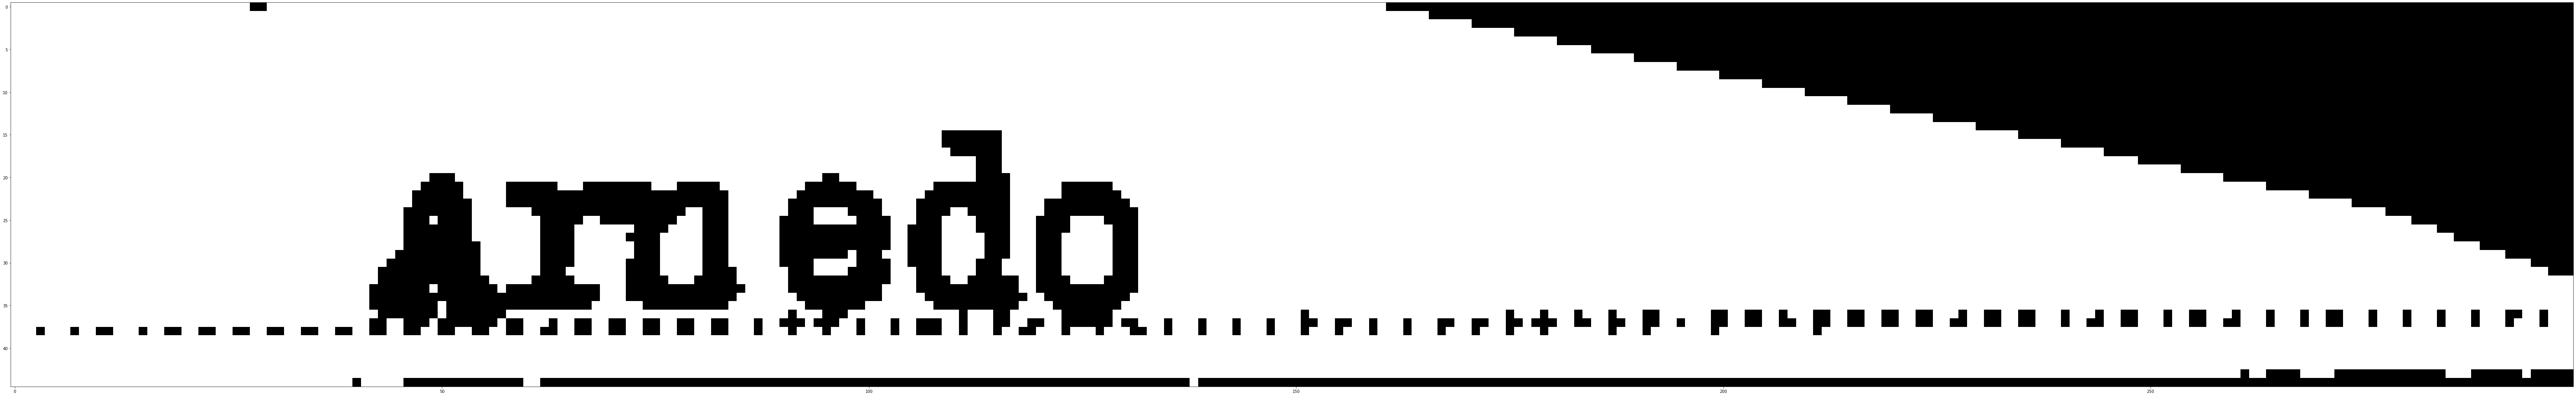

In [ ]:
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

mask = np.zeros(roi.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
mostrarImagen(mask)
final = cv2.bitwise_and(opening, opening, mask=mask)
mostrarImagen(final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


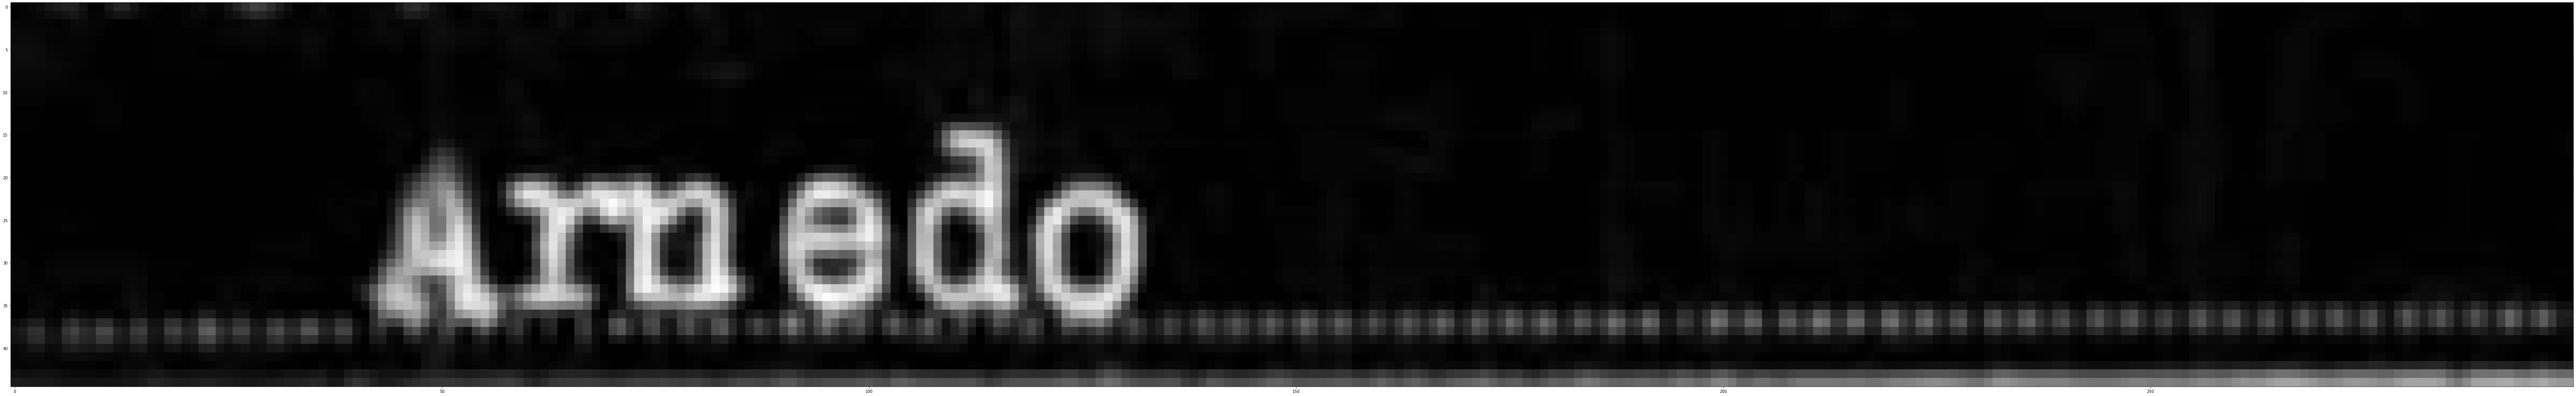

In [ ]:
(x,y,w,h)=OCR_Locations[1].bbox
roi=copia[y:y + h, x:x + w]
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
(H, W) = gray.shape

# initialize a rectangular and square structuring kernel
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 7))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

# smooth the image using a 3x3 Gaussian blur and then apply a
# blackhat morpholigical operator to find dark regions on a light
# background
gray = cv2.GaussianBlur(gray, (3, 3), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
mostrarImagen(blackhat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


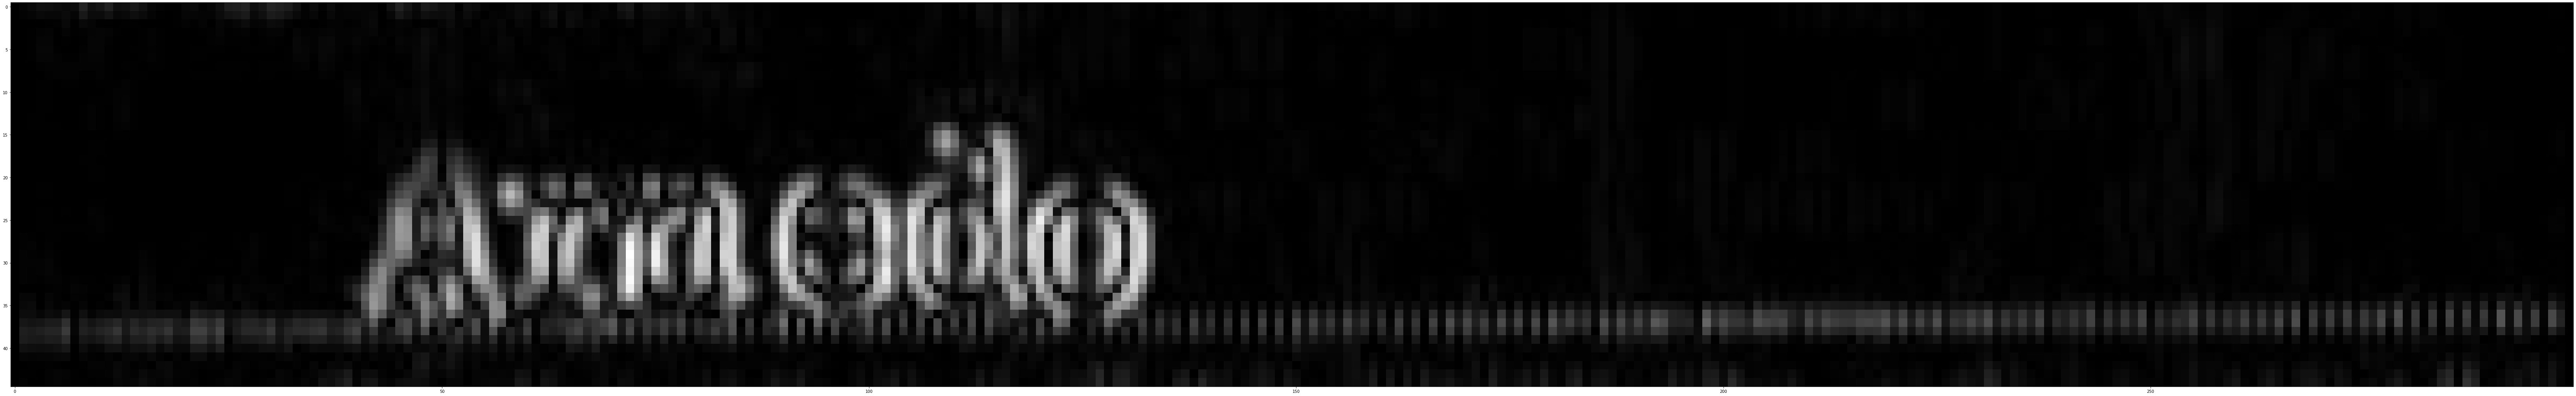

In [ ]:
grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
mostrarImagen(grad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


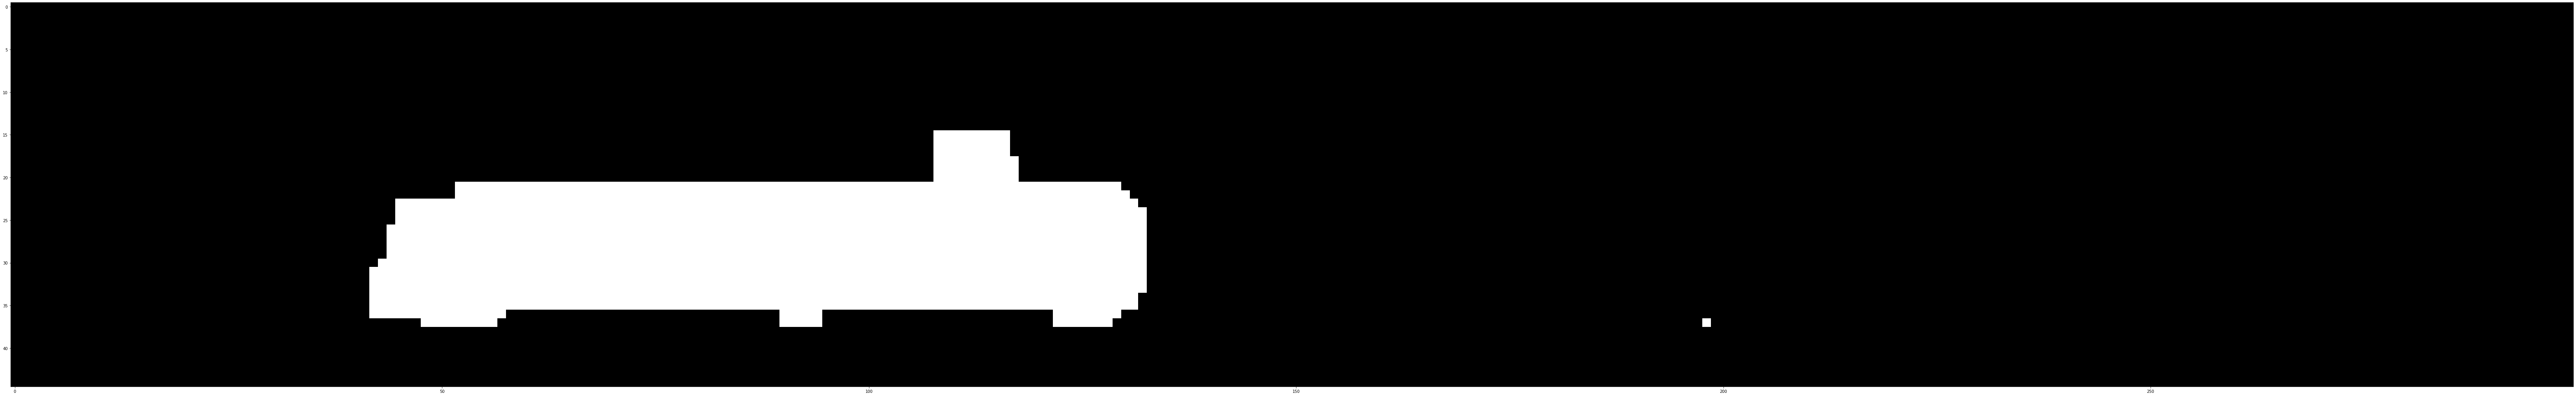

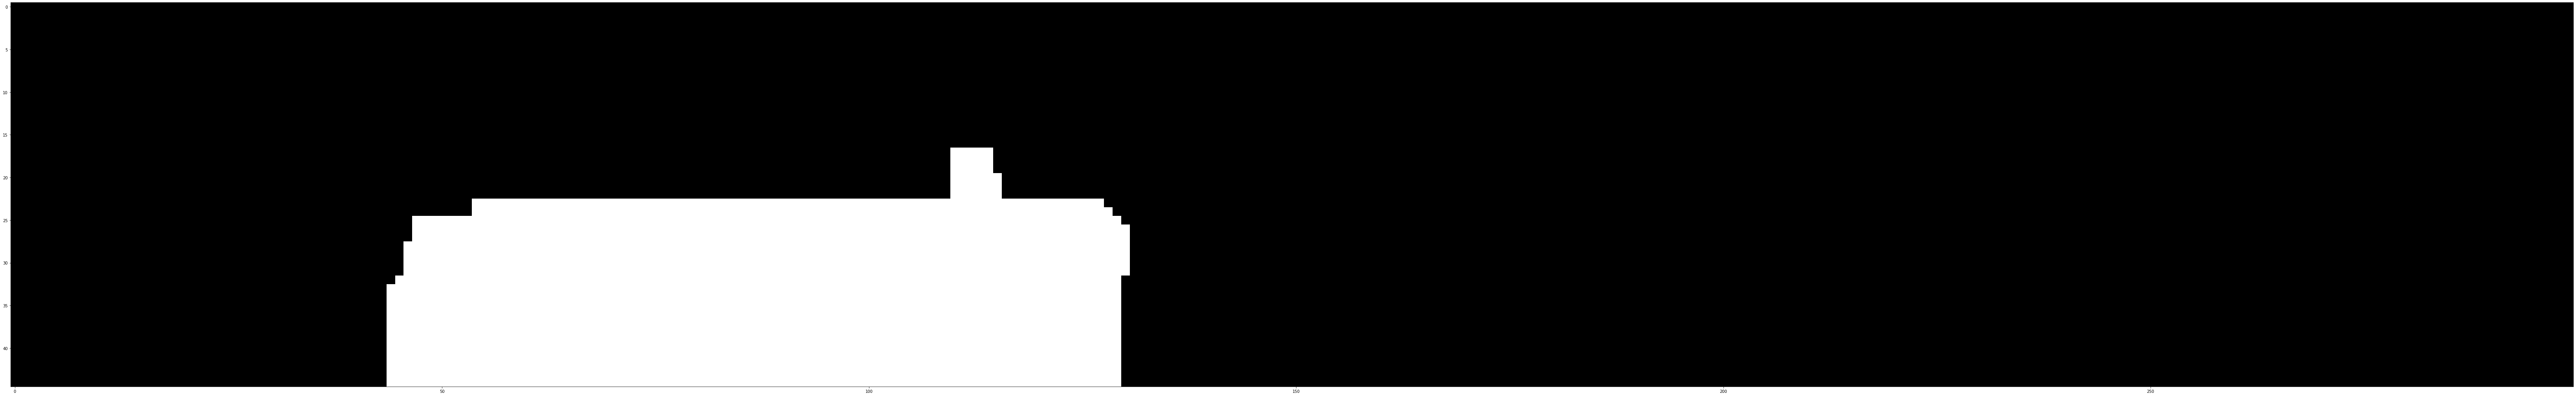

In [ ]:
grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(grad, 0, 255,
cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
mostrarImagen(thresh)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
thresh = cv2.erode(thresh, None, iterations=2)
mostrarImagen(thresh)

In [ ]:
from imutils.contours import sort_contours
import sys
import imutils

In [ ]:
print(pytesseract.image_to_string(resultado,config='--psm 8'))

et



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


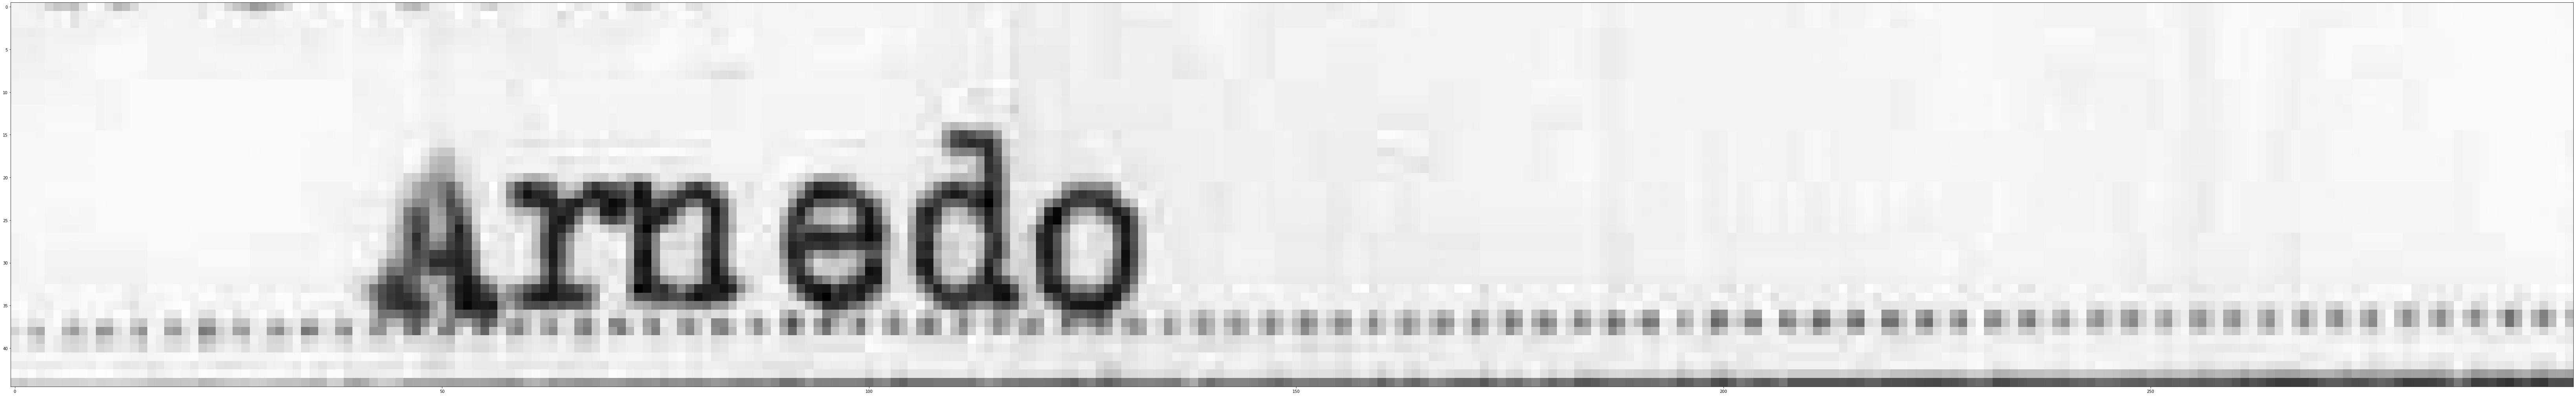

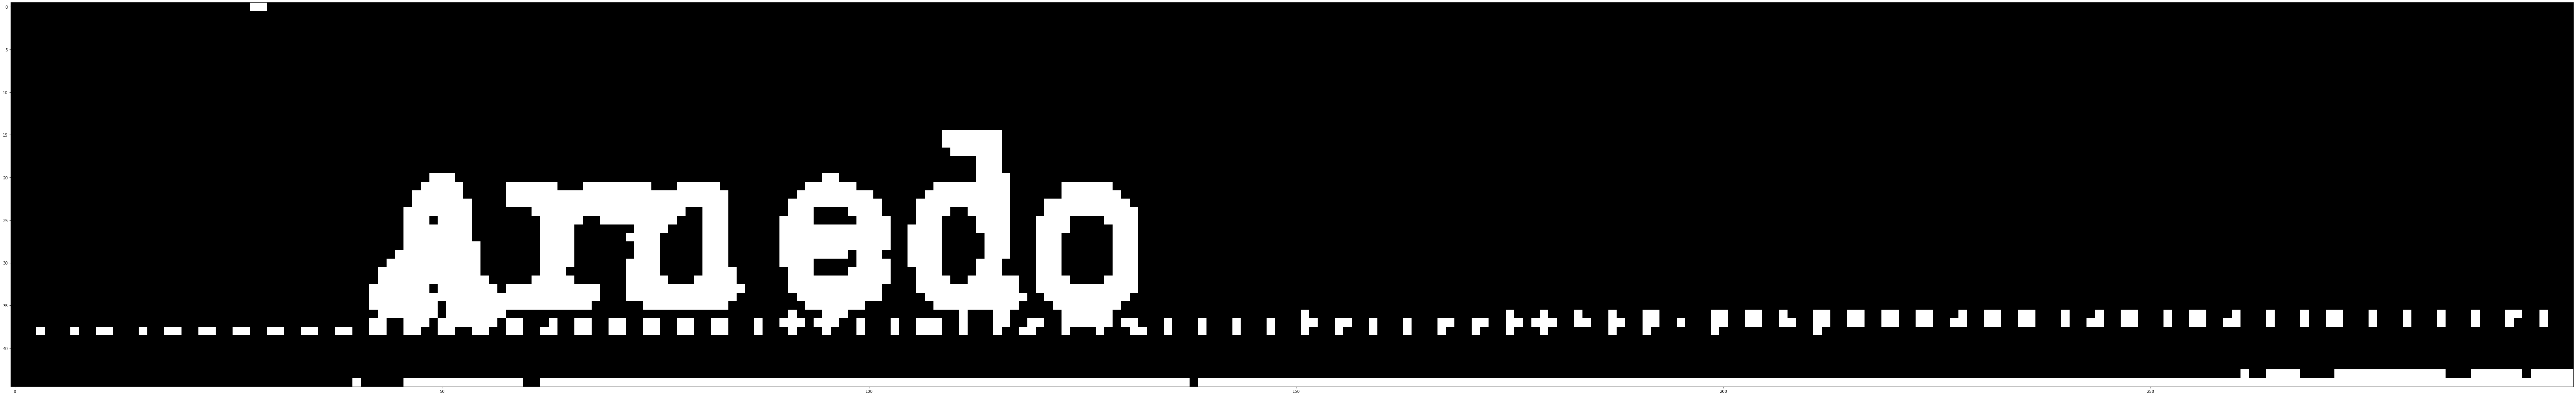

In [ ]:
(x,y,w,h)=OCR_Locations[1].bbox
roi=copia[y:y + h, x:x + w]
gray=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
mostrarImagen(gray)
thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
mostrarImagen(thresh)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


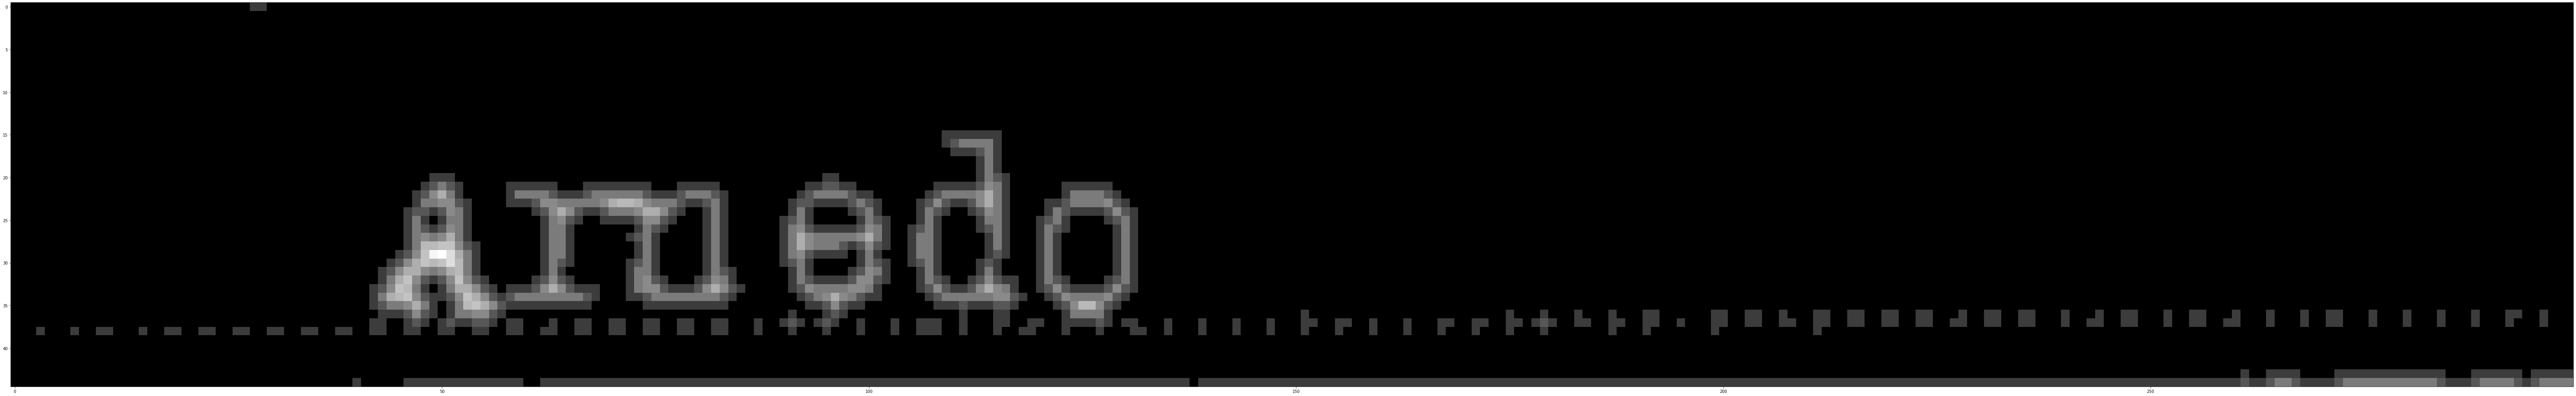

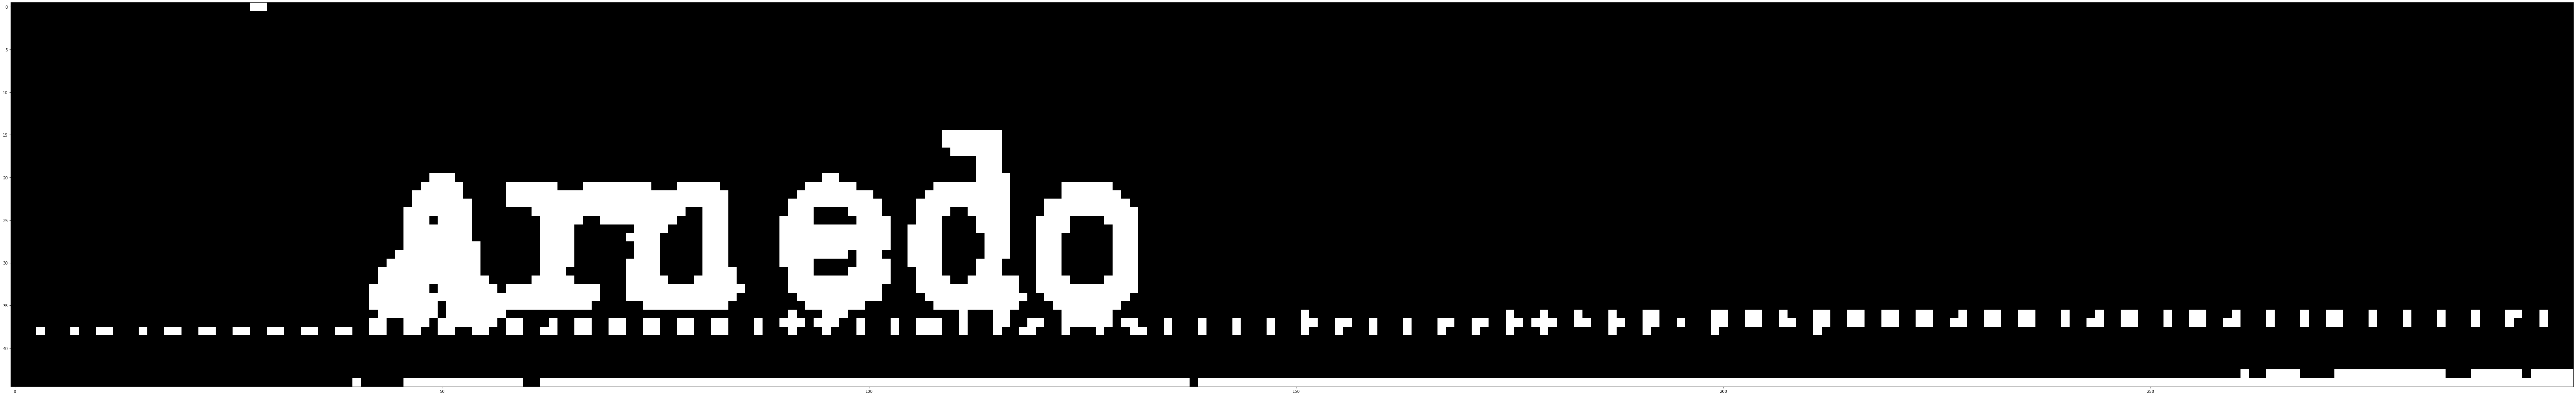

In [ ]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 0)
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")
mostrarImagen(dist)
dist = cv2.threshold(dist, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
mostrarImagen(dist)


In [ ]:
print(pytesseract.image_to_string(dist,config='--psm 8'))

ar 1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


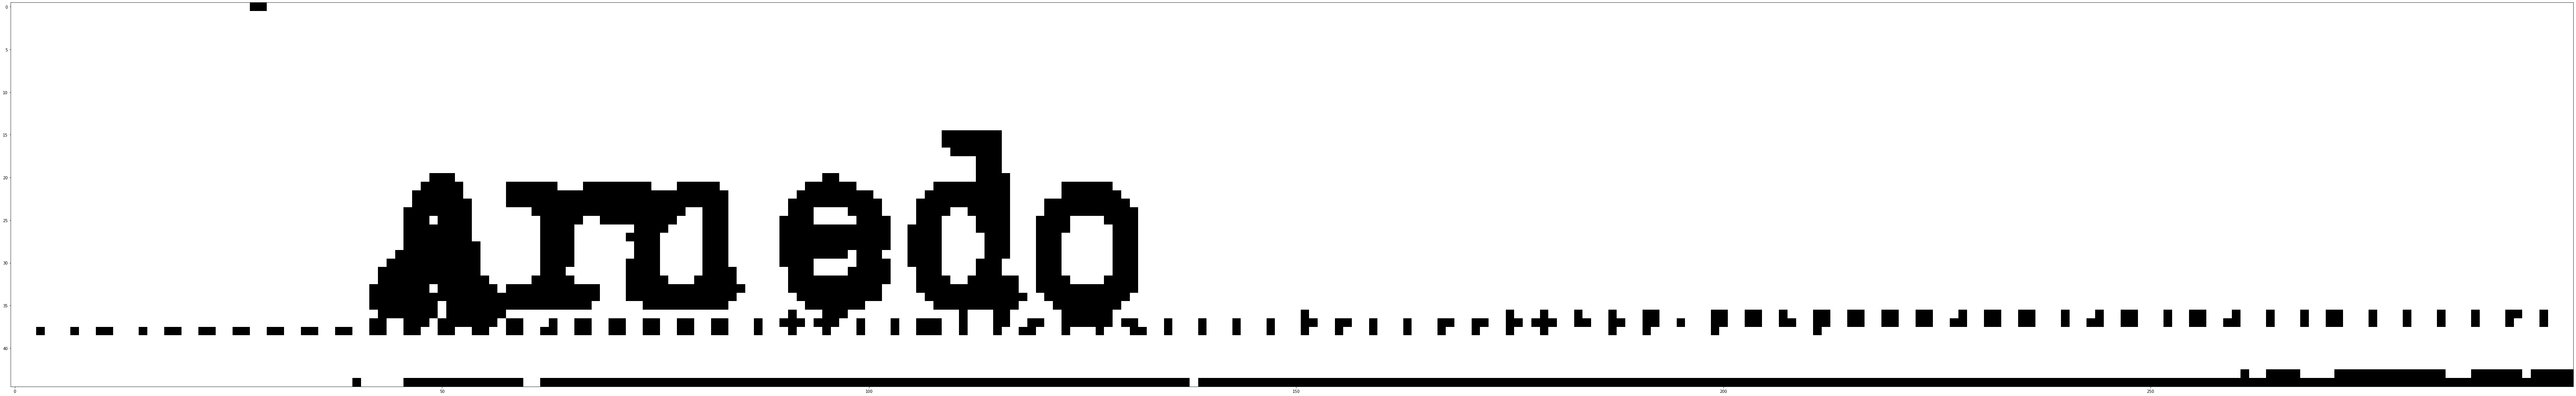

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
mostrarImagen(opening)

In [ ]:
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
chars = []
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w >= 5 and h >= 10:
    chars.append(c)


In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


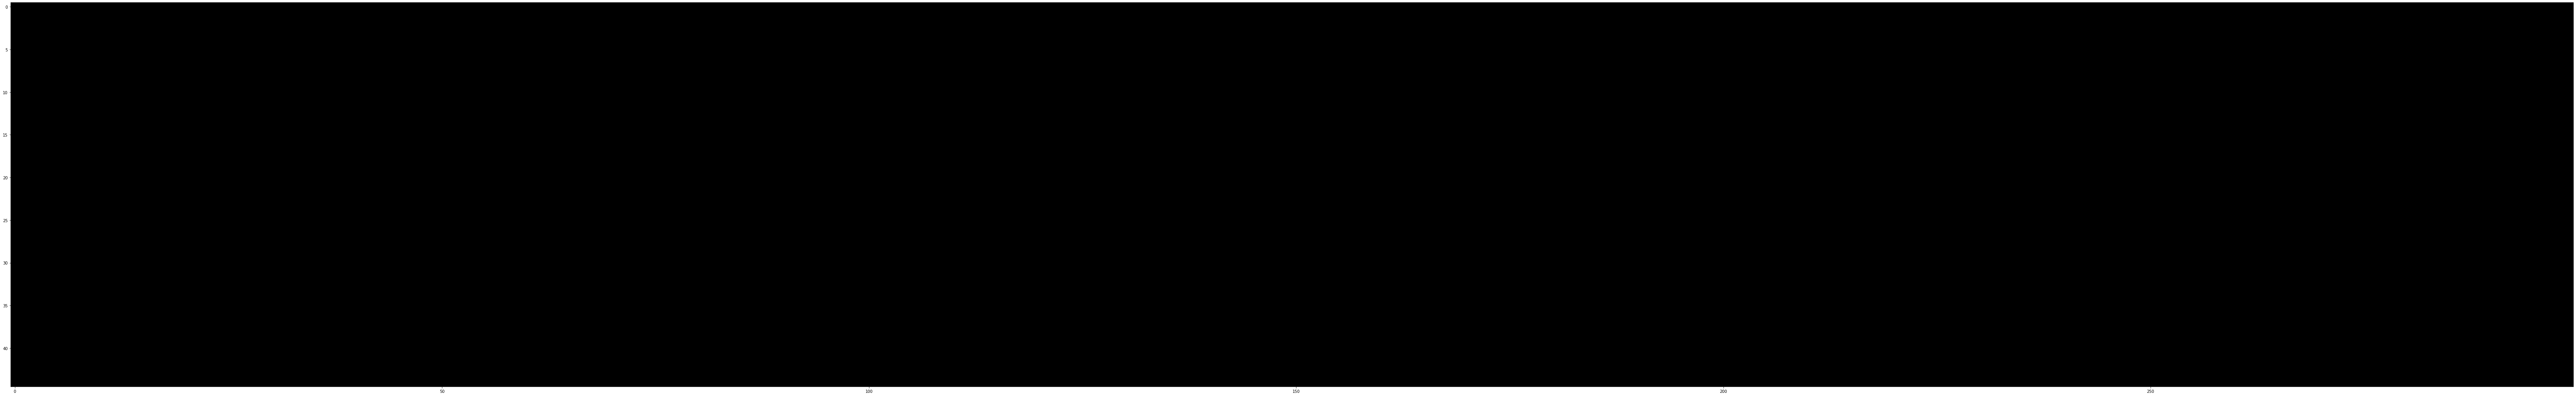

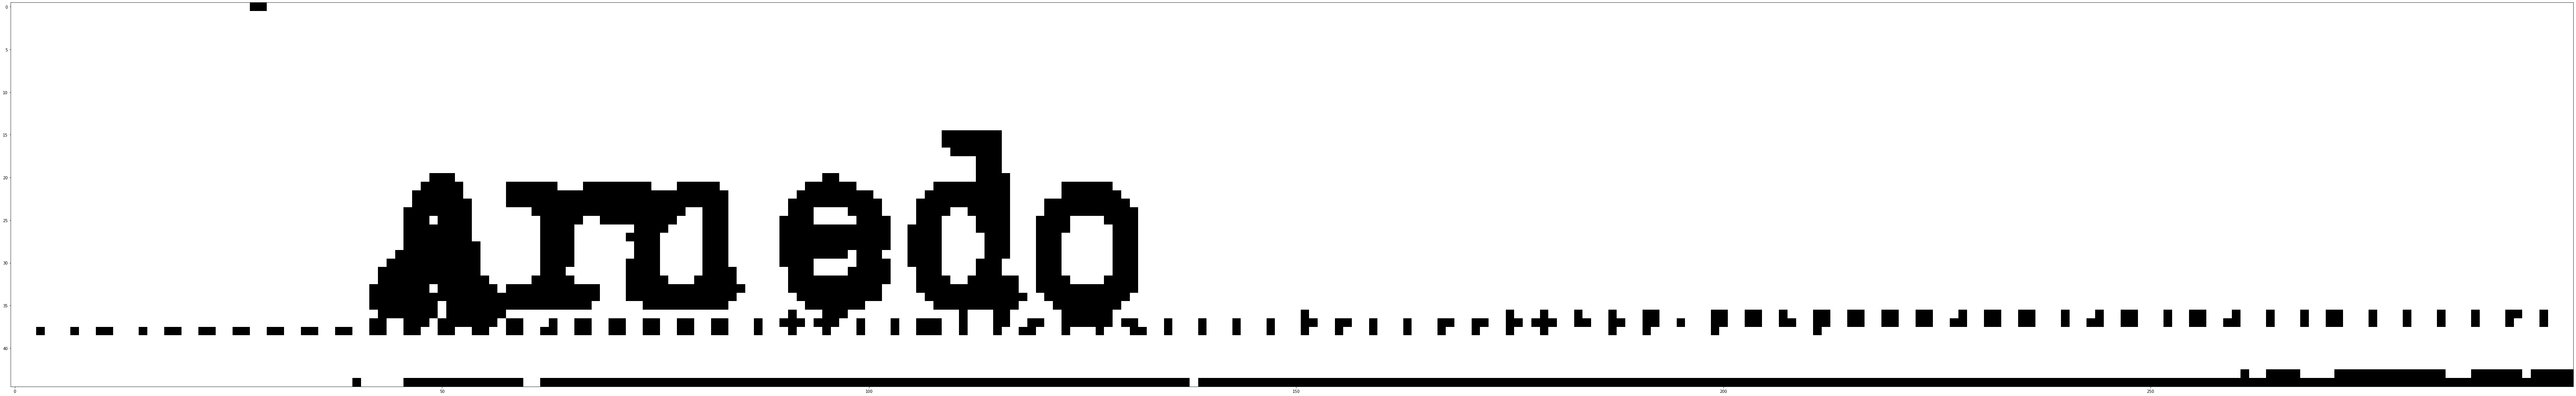

In [ ]:
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

mask = np.zeros(roi.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
mostrarImagen(mask)
final = cv2.bitwise_and(opening, opening, mask=mask)
mostrarImagen(final)

In [ ]:
print(pytesseract.image_to_string(final,config='--psm 8'))

rt



In [ ]:

roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#(thresh, roi) = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)
#roi=cv2.adaptiveThreshold(roi,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

In [ ]:
print(pytesseract.image_to_string(roi,config='--psm 8'))

ie Cee



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


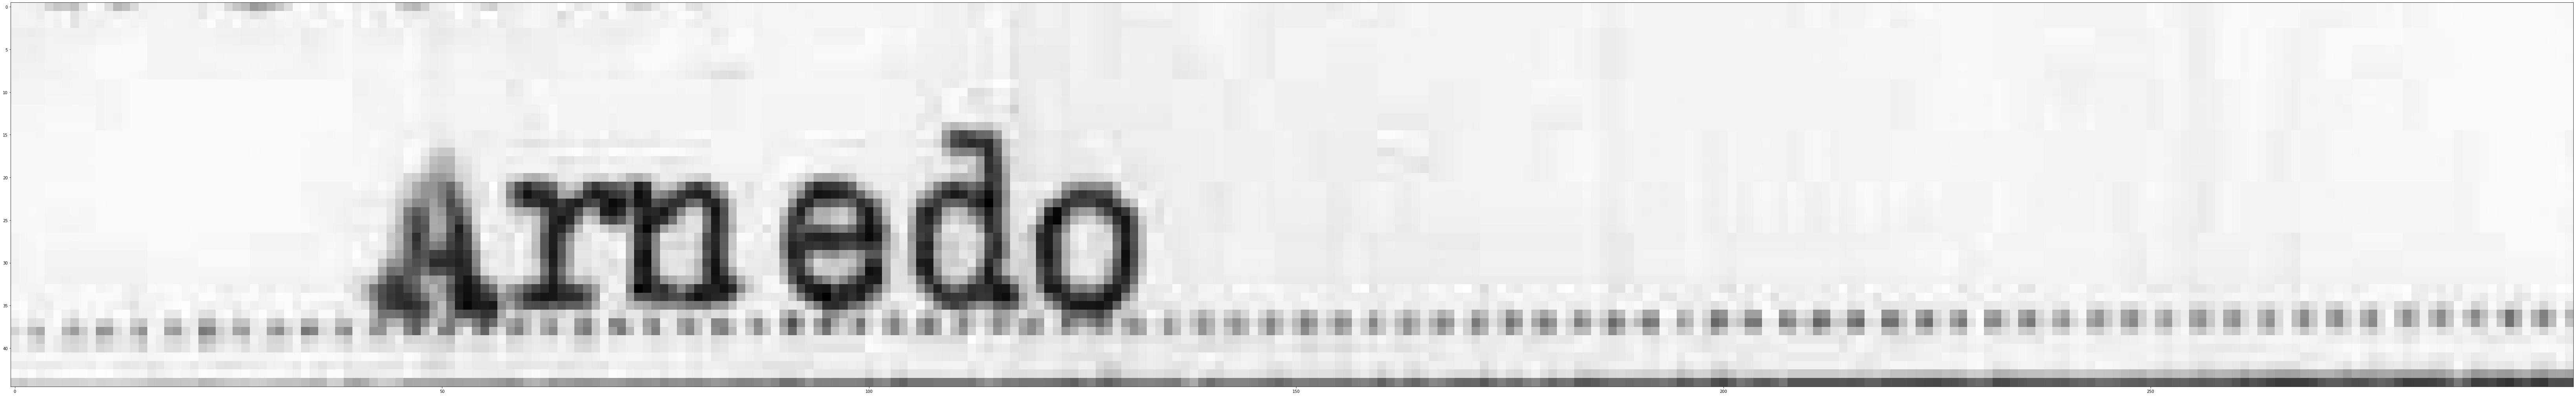

In [ ]:
mostrarImagen(roi)

In [ ]:
def filtro(imagen):
  gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  (H, W) = gray.shape

  # initialize a rectangular and square structuring kernel
  rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 7))
  sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

  # smooth the image using a 3x3 Gaussian blur and then apply a
  # blackhat morpholigical operator to find dark regions on a light
  # background
  gray = cv2.GaussianBlur(gray, (3, 3), 0)
  blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
  #mostrarImagen(blackhat)

  grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
  grad = np.absolute(grad)
  (minVal, maxVal) = (np.min(grad), np.max(grad))
  grad = (grad - minVal) / (maxVal - minVal)
  grad = (grad * 255).astype("uint8")
  #mostrarImagen(grad)

  grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
  thresh = cv2.threshold(grad, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  #mostrarImagen(thresh)
  thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
  thresh = cv2.erode(thresh, None, iterations=2)
  #mostrarImagen(thresh)

  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="bottom-to-top")[0]
  # initialize the bounding box associated with the MRZ
  mrzBox = None
  for c in cnts:

    (x, y, w, h) = cv2.boundingRect(c)
    percentWidth = w / float(W)
    percentHeight = h / float(H)


    if percentWidth > 0.2 and percentHeight > 0.04:
      print(percentHeight)
      print(percentWidth)
      mrzBox = (x, y, w, h)
      break

  if mrzBox is None:
    print("[INFO] MRZ could not be found")
    sys.exit(0)

  (x, y, w, h) = mrzBox
  pX = int((x + w) * 0.03)
  pY = int((y + h) * 0.03)
  (x, y) = (x - pX, y - pY)
  (w, h) = (w + (pX * 2), h + (pY * 2))
  mrz=imagen[y:y + h, x:x + w]
  #mostrarImagen(mrz)
  mrzText = pytesseract.image_to_string(mrz,config='--psm 8')
  mrzText = mrzText.replace(" ", "")
  return mrzText
  #print(mrzText)

In [ ]:
parsingResults=[]
for loc in OCR_Locations:
  (x,y,w,h)=loc.bbox
  roi=imagen[y:y + h, x:x + w]

  text=filtro(roi)
  print(text)

  for line in text.split("\n"):
    if(len(line))==0:
      continue
    
    lower=line.lower()
    count = 0

    if count==0:
      parsingResults.append((loc,line))

0.65
0.3419354838709677
rrajano

0.6222222222222222
0.29
Arnedo

1.0
0.8933333333333333
a...

0.575
0.5973684210526315


ValueError: ignored

In [ ]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

termino municipal
Arnedo



partido judicial
Arnedo



numero de parcela
Arnedo



cultivos 1
Arnedo





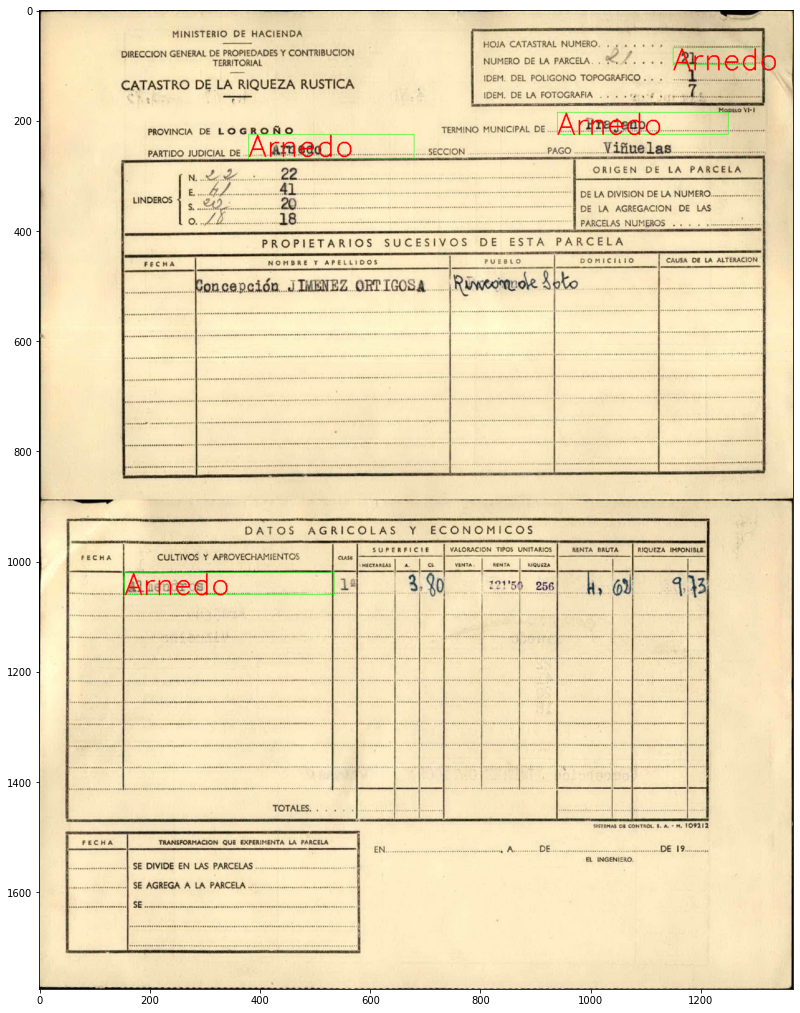

In [ ]:
results={}

for(loc,line) in parsingResults:
  r=results.get(loc.id,None)

  if r is None:
    results[loc.id]=(line,loc._asdict())
  else:
    (existingText,loc)=r
    text="{}\n".format(existingText,line)

    results[loc["id"]]=(text,loc)
for (locID,result) in results.items():
  (text,loc)=result
  print(loc["id"])
  print("=" * len(loc["id"]))
  print("{}\n\n".format(text))
  (x,y,w,h)=loc["bbox"]
  clean=cleanup_text(text)
  cv2.rectangle(imagen,(x,y),(x+w,y+h),(0,255,0,2))
  for (i,line) in enumerate(text.split("\n")):
    startY=y+(i*70)+40
    cv2.putText(imagen,line,(x,startY),cv2.FONT_HERSHEY_SIMPLEX,1.8,(0,0,255),2) 
mostrarImagen(imagen)

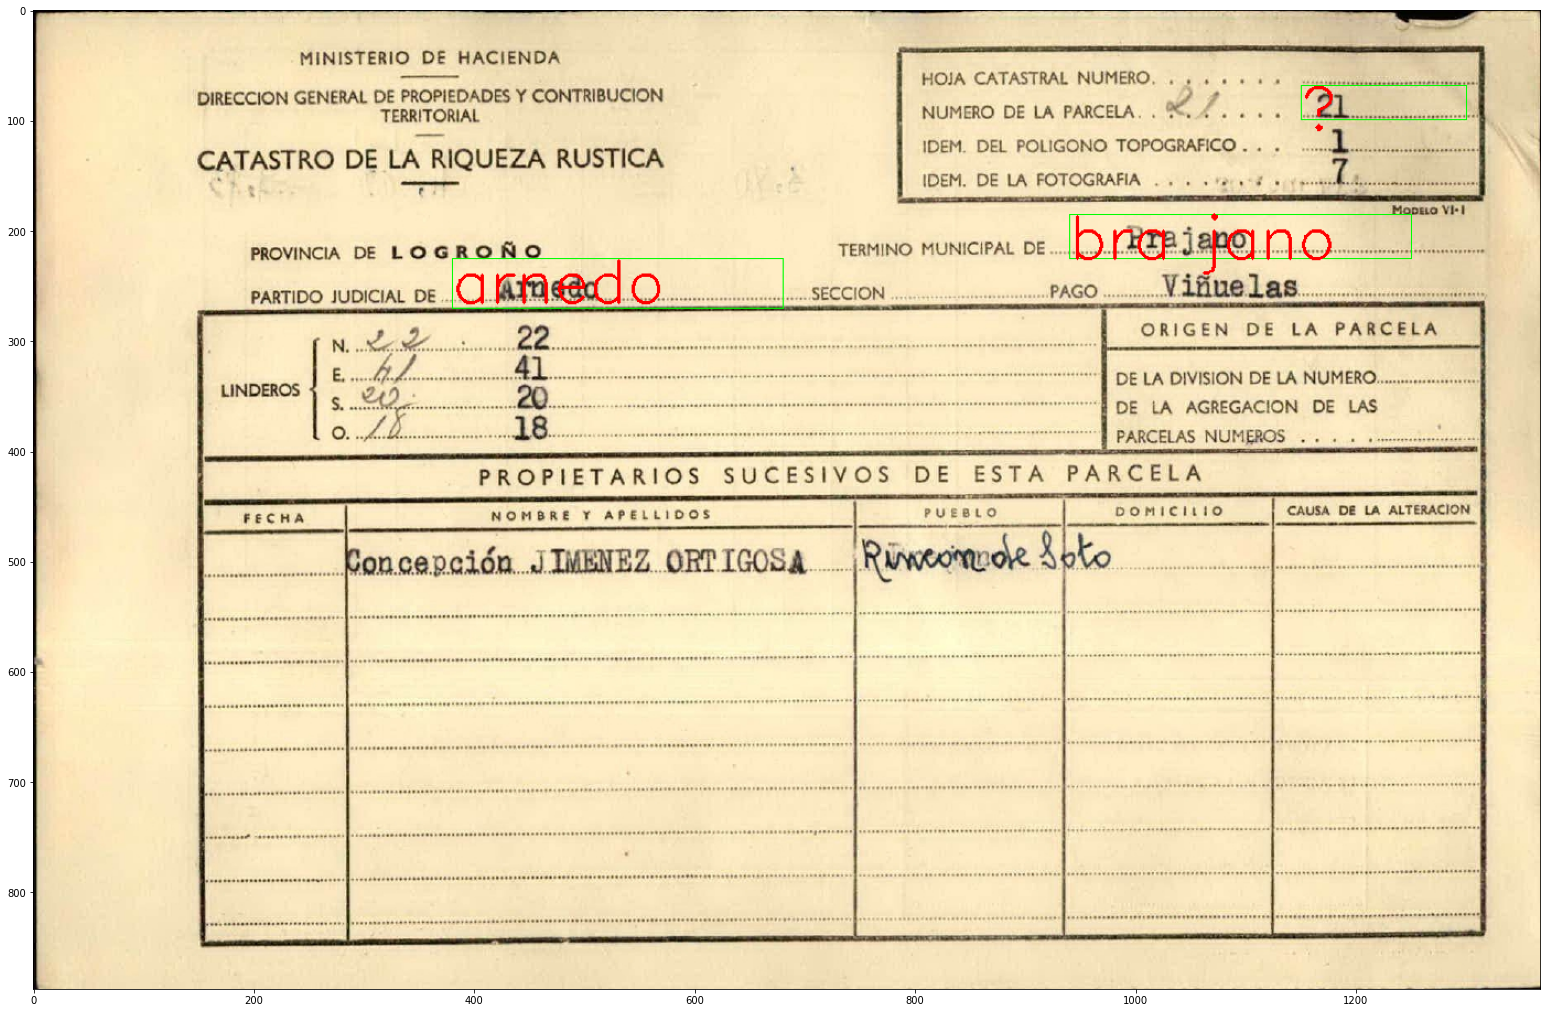

In [ ]:
(x,y,w,h)=OCR_Locations[1].bbox
roi=fichero[y:y + h, x:x + w]
mostrarImagen(roi)
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray, 0, 255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
mostrarImagen(thresh1)

In [ ]:
cnts = cv2.findContours(thresh1, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

chars = []
for c in cnts:
  
  (x, y, w, h) = cv2.boundingRect(c)
  if w >= 10 and h >= 10 and w<100 and h<30:
    chars.append(c)
clone = roi.copy()
cv2.drawContours(clone, chars, -1, (0, 255, 0), 2)
mostrarImagen(clone)

In [ ]:
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

clone = roi.copy()
mask = np.zeros(roi.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
mostrarImagen(mask)
final = cv2.bitwise_and(roi, roi, mask=mask)
mostrarImagen(final)

In [ ]:
final=aplicaFiltro(final)
mostrarImagen(final)
text=pytesseract.image_to_string(final,config='--psm 8')
text